# 数据清洗和可视化

## 导入数据和包

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_orders=pd.read_csv("C:/Users/Administrator/Desktop/python/推荐系统案例_菊安酱/data/orders.csv")

In [4]:
df_items=pd.read_csv("C:/Users/Administrator/Desktop/python/推荐系统案例_菊安酱/data/Items_orders.csv")

In [5]:
df_atrr=pd.read_csv("C:/Users/Administrator/Desktop/python/推荐系统案例_菊安酱/data/Items_attribute.csv",encoding='gbk')

## 探索数据

In [6]:
df_orders.info()
#1、大量缺失值，注意缺失值的删除方法
#2、订单数据相关的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 46 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
买家支付积分      3989 non-null int64
总金额         3989 non-null float64
返点积分        3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
运送方式        3989 non-null object
联系电话        142 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
店铺Id        3989 non-null int64
店铺名称        3989 non-null int64
订单关闭原因     

In [7]:
df_items.info()
#1、列不多，有效的字段也就前面几个，后有缺失值可删除

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 10 columns):
订单编号      21897 non-null int64
标题        21897 non-null object
价格        21897 non-null float64
购买数量      21897 non-null int64
外部系统编号    21897 non-null object
商品属性      12636 non-null object
套餐信息      0 non-null float64
备注        130 non-null object
订单状态      21897 non-null object
商家编码      21897 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


In [8]:
df_atrr.info()
#1、标题和价格和品牌都无缺失值，且适用年龄可以采用缺失值填补，确定填补的方案

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
宝贝ID    288 non-null int64
标题      288 non-null object
价格      288 non-null float64
玩具类型    252 non-null object
适用年龄    284 non-null object
品牌      288 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 13.6+ KB


## 处理df_orders表

In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 46 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
买家支付积分      3989 non-null int64
总金额         3989 non-null float64
返点积分        3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
运送方式        3989 non-null object
联系电话        142 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
店铺Id        3989 non-null int64
店铺名称        3989 non-null int64
订单关闭原因     

### 删除缺失值大于80%的字段

In [18]:
df_orders.isnull().mean()>0.8

订单编号        False
买家会员名       False
买家支付宝账号     False
买家应付货款      False
买家应付邮费      False
买家支付积分      False
总金额         False
返点积分        False
买家实际支付金额    False
买家实际支付积分    False
订单状态        False
买家留言         True
收货人姓名       False
收货地址        False
运送方式        False
联系电话         True
联系手机        False
订单创建时间      False
订单付款时间      False
宝贝标题        False
宝贝种类        False
物流单号        False
物流公司        False
订单备注         True
宝贝总数量       False
店铺Id        False
店铺名称        False
订单关闭原因      False
卖家服务费       False
买家服务费       False
发票抬头         True
是否手机订单      False
分阶段订单信息      True
特权订金订单id     True
是否上传合同照片    False
是否上传小票      False
是否代付        False
定金排名         True
修改后的sku      True
修改后的收货地址     True
异常信息         True
天猫卡券抵扣       True
集分宝抵扣        True
是否是O2O交易     True
退款金额        False
预约门店         True
dtype: bool

In [38]:
df_drop1=pd.DataFrame(df_orders.isnull().mean()>0.8).rename(columns={'index':'字段名',0:'真假'})

In [42]:
df_drop1_index=df_drop1[df_drop1.真假==True].index

In [43]:
df_drop1_index

Index(['买家留言', '联系电话 ', '订单备注', '发票抬头', '分阶段订单信息', '特权订金订单id', '定金排名',
       '修改后的sku', '修改后的收货地址', '异常信息', '天猫卡券抵扣', '集分宝抵扣', '是否是O2O交易', '预约门店'],
      dtype='object')

### 提取修改后的收货地址

In [48]:
df_orders.columns

Index(['订单编号', '买家会员名', '买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分',
       '买家实际支付金额', '买家实际支付积分', '订单状态', '买家留言', '收货人姓名', '收货地址', '运送方式',
       '联系电话 ', '联系手机', '订单创建时间', '订单付款时间 ', '宝贝标题 ', '宝贝种类', '物流单号 ', '物流公司',
       '订单备注', '宝贝总数量', '店铺Id', '店铺名称', '订单关闭原因', '卖家服务费', '买家服务费', '发票抬头',
       '是否手机订单', '分阶段订单信息', '特权订金订单id', '是否上传合同照片', '是否上传小票', '是否代付', '定金排名',
       '修改后的sku', '修改后的收货地址', '异常信息', '天猫卡券抵扣', '集分宝抵扣', '是否是O2O交易', '退款金额',
       '预约门店'],
      dtype='object')

In [52]:
df_drop2_index=df_orders[df_orders['修改后的收货地址'].notnull()][['修改后的收货地址','收货地址']].index

In [53]:
df_orders[df_orders['修改后的收货地址'].notnull()][['修改后的收货地址','收货地址']]

,修改后的收货地址,收货地址
75,湖北省 武汉市 新洲区 道观河旅游大道200号,湖北省 武汉市 江夏区 江夏区经济开发区庙山办事处湖北省武汉市江夏庙山经济开发区邬树村明泽街...
102,江西省 抚州市 临川区 唱凯镇老街上,江西省 抚州市 临川区 唱凯镇唱凯老街上(344100)
125,广东省 潮州市 潮安区东凤镇下张村烈士墓附近,广东省 潮州市 潮安区 庵埠镇庵北派出所隔壁汇庭4楼(515600)
146,广东省 东莞市 望牛墩镇望东函谷村17巷167号,广东省 东莞市 东城街道东城南路新世界花园青松路122号1D(523000)
197,河南省 商丘市 夏邑县 南环区百老汇,河南省 商丘市 夏邑县 曹集乡冉冉新城(476400)
209,江苏省 镇江市 扬中市 环城南路48号,江苏省 镇江市 扬中市 三茅街道扬中市三茅街道环城南路106号(212200)
255,河南省 三门峡市 卢氏县 城关镇 河南省三门峡市卢氏县西关县医院后面,河南省 三门峡市 卢氏县 城关镇河南省三门峡市卢氏县西关县医院后面(472200)
389,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,河南省 新乡市 封丘县 城关镇老转盘西，西子日化(453300)
390,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,河南省 新乡市 封丘县 城关镇老转盘西，西子日化(453300)
523,广东省 湛江市 徐闻县 城东大道小米厨卫,广东省 广州市 白云区 石井街道石井镇 张村 韵达快递门口(510440)


In [55]:
df_orders.收货地址[75]=df_orders.修改后的收货地址[75]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_orders.收货地址[75]

'湖北省 武汉市 新洲区    道观河旅游大道200号'

In [57]:
for i in df_drop2_index:
    df_orders.收货地址[i]=df_orders.修改后的收货地址[i]   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
df_orders[df_orders['修改后的收货地址'].notnull()][['修改后的收货地址','收货地址']]

,修改后的收货地址,收货地址
75,湖北省 武汉市 新洲区 道观河旅游大道200号,湖北省 武汉市 新洲区 道观河旅游大道200号
102,江西省 抚州市 临川区 唱凯镇老街上,江西省 抚州市 临川区 唱凯镇老街上
125,广东省 潮州市 潮安区东凤镇下张村烈士墓附近,广东省 潮州市 潮安区东凤镇下张村烈士墓附近
146,广东省 东莞市 望牛墩镇望东函谷村17巷167号,广东省 东莞市 望牛墩镇望东函谷村17巷167号
197,河南省 商丘市 夏邑县 南环区百老汇,河南省 商丘市 夏邑县 南环区百老汇
209,江苏省 镇江市 扬中市 环城南路48号,江苏省 镇江市 扬中市 环城南路48号
255,河南省 三门峡市 卢氏县 城关镇 河南省三门峡市卢氏县西关县医院后面,河南省 三门峡市 卢氏县 城关镇 河南省三门峡市卢氏县西关县医院后面
389,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸
390,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸
523,广东省 湛江市 徐闻县 城东大道小米厨卫,广东省 湛江市 徐闻县 城东大道小米厨卫


### 提取修改后的sku

In [60]:
df_orders['修改后的sku'].unique()
#可以删除

array([nan])

### 删除缺失值大于80%的字段

In [61]:
df_orders.drop(columns=df_drop1_index,inplace=True)

In [64]:
len(df_orders.columns)

32

### 删除只有一种结果的字段

In [66]:
#因为聚类或者推荐算法中，如果只有一个值的话就没有意义
df_orders.columns

Index(['订单编号', '买家会员名', '买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分',
       '买家实际支付金额', '买家实际支付积分', '订单状态', '收货人姓名', '收货地址', '运送方式', '联系手机',
       '订单创建时间', '订单付款时间 ', '宝贝标题 ', '宝贝种类', '物流单号 ', '物流公司', '宝贝总数量', '店铺Id',
       '店铺名称', '订单关闭原因', '卖家服务费', '买家服务费', '是否手机订单', '是否上传合同照片', '是否上传小票',
       '是否代付', '退款金额'],
      dtype='object')

In [67]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 32 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
买家支付积分      3989 non-null int64
总金额         3989 non-null float64
返点积分        3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
运送方式        3989 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
宝贝总数量       3989 non-null int64
店铺Id        3989 non-null int64
店铺名称        3989 non-null int64
订单关闭原因      3989 non-null object
卖家服务费       3989 non-null int64
买家服务费       3989 non-null object
是否手机订单   

In [68]:
df_orders.订单状态.nunique()

1

In [69]:
df_orders.买家支付积分.nunique()

1

In [70]:
df_orders.买家支付积分.unique()

array([0], dtype=int64)

In [71]:
for col in df_orders.columns:
    if df_orders[col].nunique()==1:
        del df_orders[col]

In [73]:
len(df_orders.columns)

18

In [74]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 18 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
总金额         3989 non-null float64
买家实际支付金额    3989 non-null float64
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
宝贝总数量       3989 non-null int64
退款金额        3989 non-null float64
dtypes: float64(5), int64(5), object(8)
memory usage: 561.0+ KB


In [77]:
df_orders['买家应付货款'].value_counts()

7.90      130
6.90       61
29.90      48
15.90      34
8.90       28
5.90       26
9.90       25
7.80       21
19.90      20
11.80      19
16.90      19
13.80      18
15.80      17
4.90       16
7.75       15
58.00      15
39.90      13
19.80      12
59.00      12
39.00      12
49.00      12
33.80      12
11.70      12
20.70      11
100.00     10
3.90       10
9.80       10
90.00      10
12.90      10
13.90      10
         ... 
74.00       1
246.74      1
55.38       1
66.00       1
47.73       1
14.75       1
157.39      1
81.00       1
880.00      1
35.16       1
184.61      1
61.40       1
215.60      1
71.00       1
440.00      1
50.69       1
582.08      1
368.30      1
61.00       1
39.85       1
8.25        1
11.25       1
19.09       1
122.33      1
37.76       1
54.28       1
16.93       1
19.70       1
127.00      1
58.01       1
Name: 买家应付货款, Length: 2421, dtype: int64

### 删除不重要的字段

In [80]:
df_orders.columns

Index(['订单编号', '买家会员名', '买家支付宝账号', '买家应付货款', '买家应付邮费', '总金额', '买家实际支付金额',
       '收货人姓名', '收货地址', '联系手机', '订单创建时间', '订单付款时间 ', '宝贝标题 ', '宝贝种类', '物流单号 ',
       '物流公司', '宝贝总数量', '退款金额'],
      dtype='object')

In [86]:
cols=['买家支付宝账号','买家应付货款', '买家应付邮费','联系手机', '物流公司','订单创建时间','退款金额']

In [87]:
df_orders.drop(columns=cols,inplace=True)

In [88]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 11 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
总金额         3989 non-null float64
买家实际支付金额    3989 non-null float64
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
宝贝总数量       3989 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 342.9+ KB


### 去除列字段两边的空格

In [99]:
col=[]
for i in df_orders.columns:
    col.append(i.strip())
print(col)    

['订单编号', '买家会员名', '买家实际支付金额', '收货地址', '宝贝种类', '宝贝总数量']


In [97]:
df_orders.columns=col

In [98]:
df_orders.drop(columns=['总金额','收货人姓名','订单付款时间','宝贝标题','物流单号'],inplace=True)

### 收货地址处理

In [106]:
df_orders['收货地址']=df_orders['收货地址'].str.split(' ',expand=True)[0]

In [108]:
df_orders.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8


### 连续变量的可视化

In [110]:
df_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
订单编号,3989.0,1.768421e+16,3.608683e+15,4.931300e+15,1.502612e+16,1.791438e+16,2.035314e+16,2.428163e+16
买家会员名,3989.0,1.705995e+03,9.761863e+02,0.000000e+00,8.700000e+02,1.716000e+03,2.534000e+03,3.410000e+03
买家实际支付金额,3989.0,7.261367e+01,1.122798e+02,0.000000e+00,2.208000e+01,5.232000e+01,7.700000e+01,3.521000e+03
宝贝种类,3989.0,5.489346e+00,6.222972e+00,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,5.000000e+01
宝贝总数量,3989.0,2.409401e+01,4.601493e+01,1.000000e+00,4.000000e+00,1.000000e+01,2.600000e+01,8.200000e+02


In [112]:
df_orders.买家实际支付金额.value_counts()

12.90     124
11.90      58
34.90      44
20.90      33
13.90      28
10.90      23
14.90      21
12.80      20
24.90      19
16.80      19
21.90      18
20.80      16
9.90       16
58.00      15
18.80      15
12.75      14
54.00      14
44.90      13
38.80      13
59.00      13
16.70      12
17.90      11
24.80      11
100.00     10
7.90       10
14.80      10
18.90      10
90.00      10
25.70      10
44.00       9
         ... 
62.24       1
56.98       1
420.60      1
11.45       1
72.20       1
64.68       1
36.15       1
53.14       1
165.32      1
59.36       1
87.91       1
46.87       1
99.60       1
30.26       1
26.77       1
92.79       1
33.37       1
161.60      1
97.84       1
53.53       1
83.11       1
69.87       1
24.33       1
43.34       1
31.35       1
46.20       1
26.97       1
83.42       1
56.90       1
185.41      1
Name: 买家实际支付金额, Length: 2451, dtype: int64

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

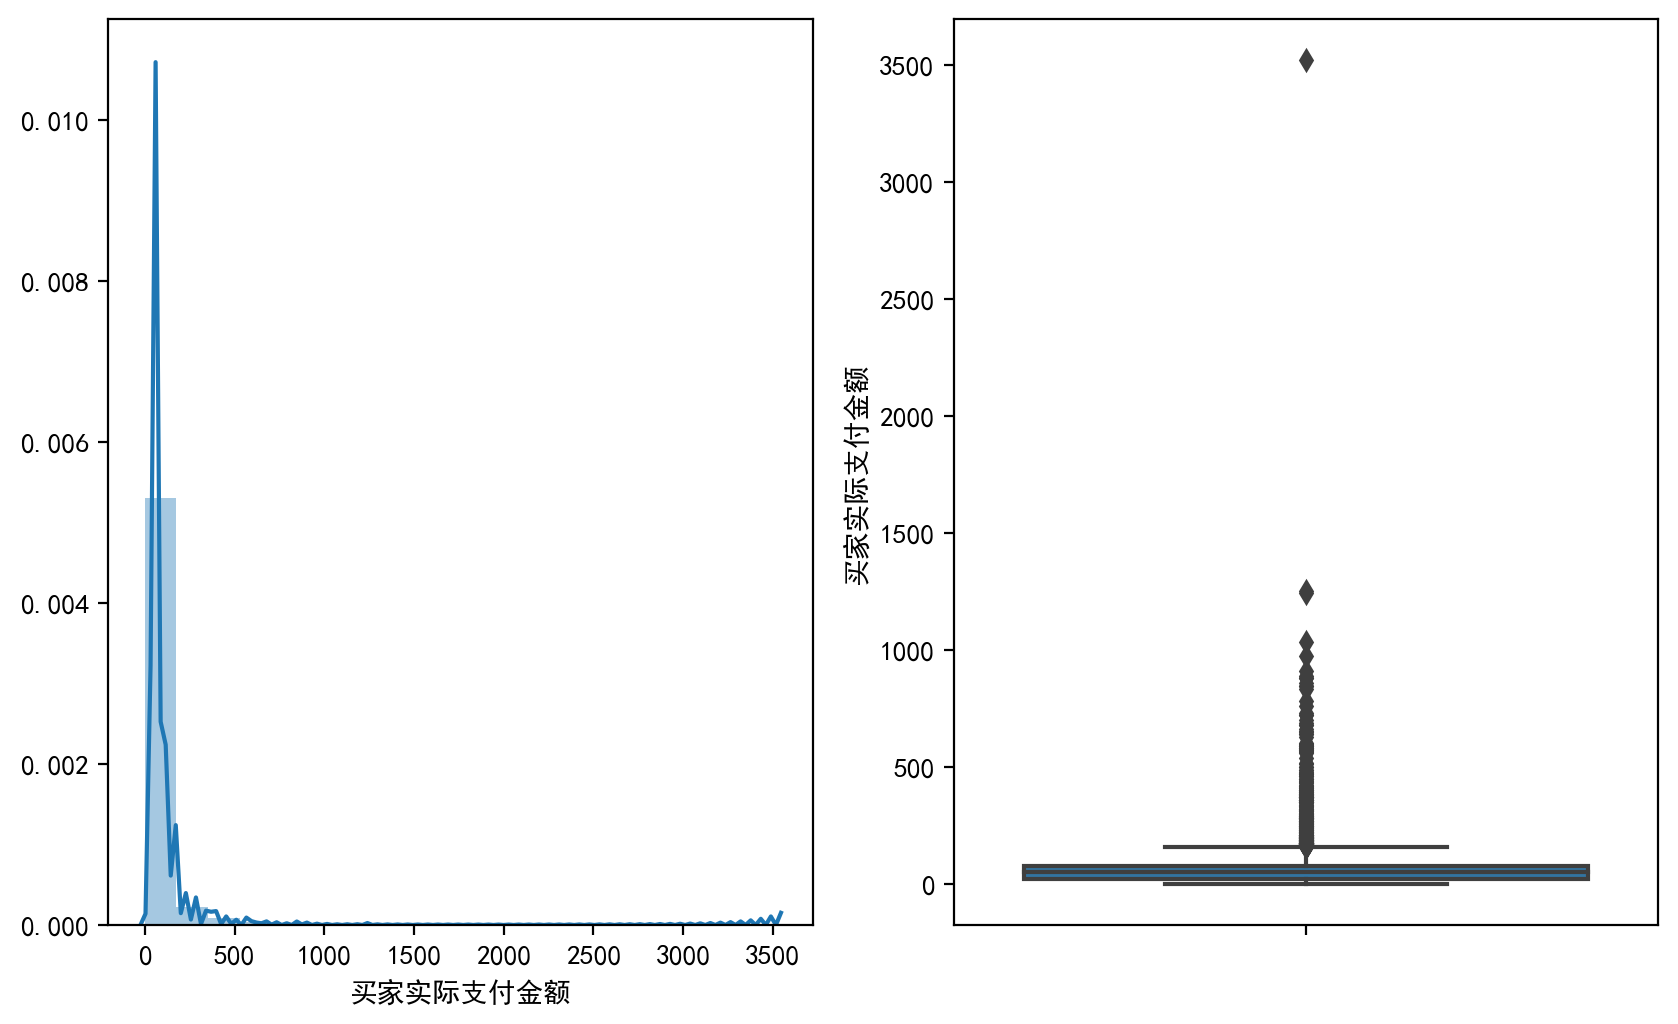

In [114]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.买家实际支付金额,bins=20,ax=ax1)
sns.boxplot(y='买家实际支付金额',data=df_orders,ax=ax2)
#数据处于严重右偏分布状态，存在异常数据，可以用哪些方法处理？

In [115]:
df_orders[df_orders['买家实际支付金额']>1000]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
727,19477421285185300,2724,1250.0,广东省,5,395
845,22672769847704100,2893,3521.0,福建省,11,190
852,19135600098460000,1324,1033.0,浙江省,1,53
1119,18508580079473300,2128,1245.0,福建省,1,500


In [117]:
df_orders=df_orders[df_orders['买家实际支付金额']<1500]

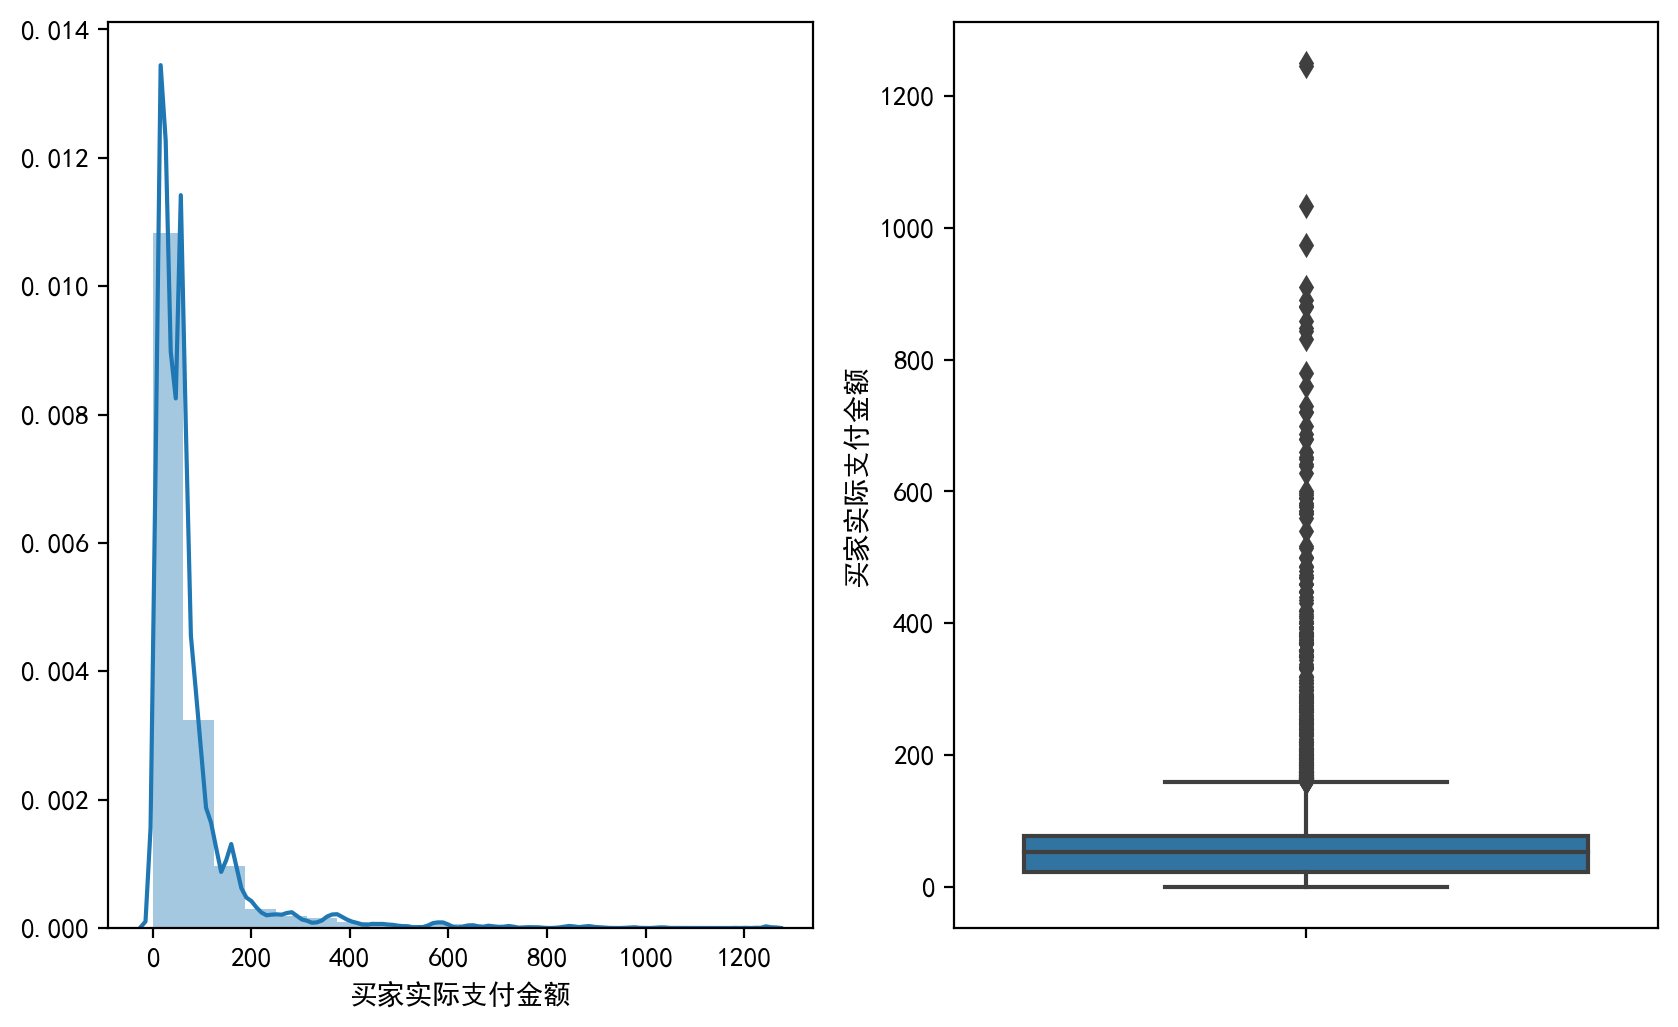

In [118]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.买家实际支付金额,bins=20,ax=ax1)
sns.boxplot(y='买家实际支付金额',data=df_orders,ax=ax2)

In [120]:
df_orders['宝贝种类'].value_counts()

1     1529
2      299
3      254
4      244
5      234
6      218
8      157
7      147
9      136
10     121
12      98
11      96
13      72
14      60
15      58
16      39
17      35
18      28
19      25
21      22
20      20
23      14
24      11
22       8
25       7
26       6
27       5
38       5
28       5
29       4
33       4
49       4
36       3
30       3
40       2
37       2
41       2
45       1
32       1
34       1
46       1
48       1
43       1
47       1
31       1
35       1
39       1
50       1
Name: 宝贝种类, dtype: int64

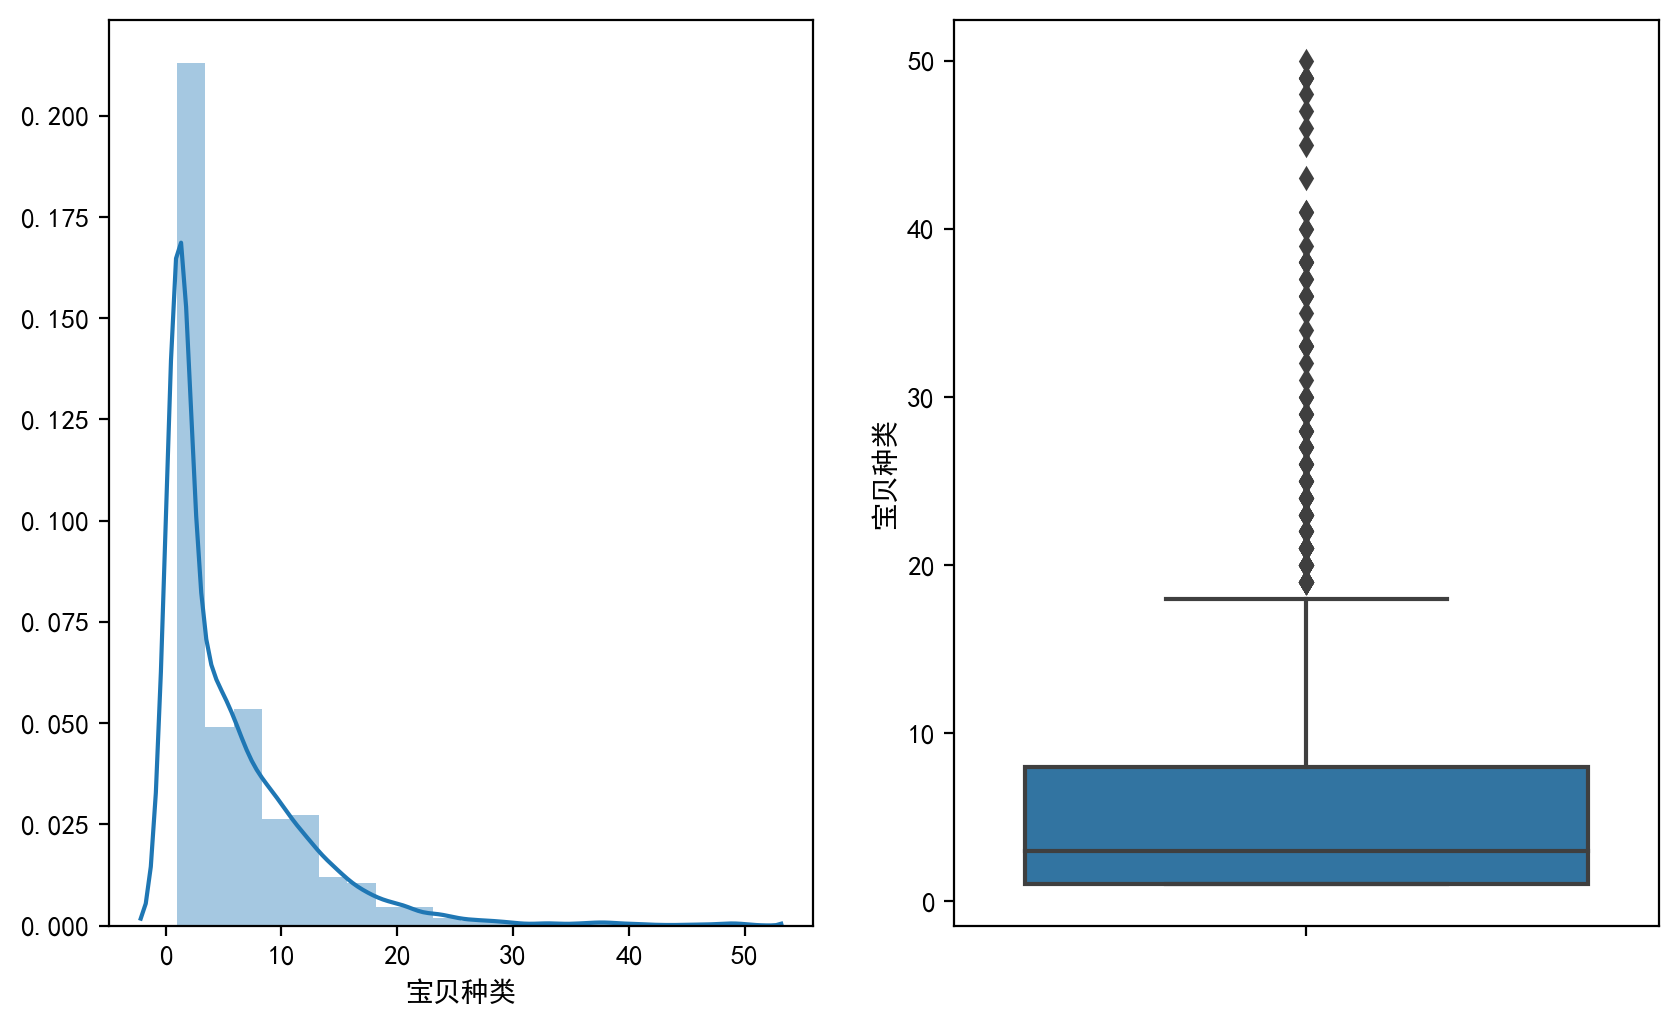

In [121]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.宝贝种类,bins=20,ax=ax1)
sns.boxplot(y='宝贝种类',data=df_orders,ax=ax2)
#数据处于严重右偏分布状态，异常值还好，拖尾不严重

In [122]:
df_orders['宝贝总数量'].value_counts()

1      558
10     222
2      220
5      211
3      178
4      159
6      151
20     138
8      123
7      107
15     100
12      91
9       88
13      70
11      68
14      68
30      67
16      55
25      52
18      52
17      48
24      45
23      44
100     44
19      43
22      41
28      40
21      39
50      38
40      35
      ... 
215      1
247      1
265      1
279      1
99       1
91       1
114      1
820      1
122      1
126      1
136      1
140      1
152      1
156      1
158      1
168      1
188      1
220      1
230      1
240      1
270      1
280      1
300      1
320      1
330      1
362      1
395      1
580      1
700      1
378      1
Name: 宝贝总数量, Length: 173, dtype: int64

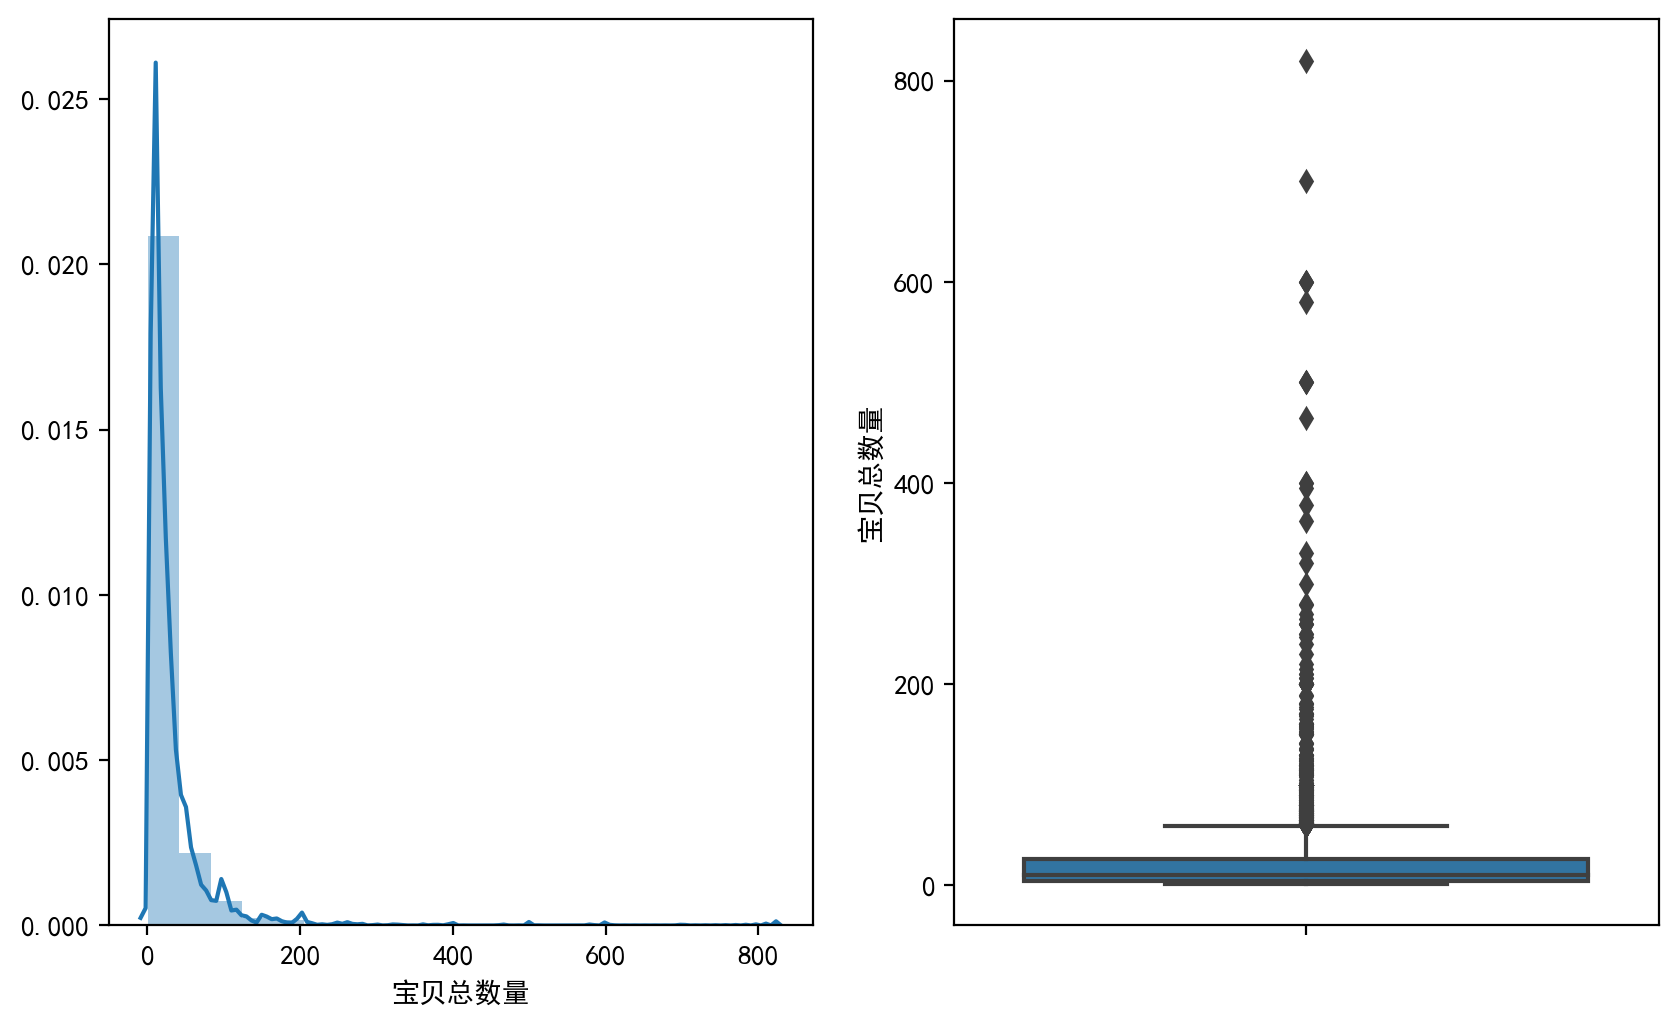

In [123]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.宝贝总数量,bins=20,ax=ax1)
sns.boxplot(y='宝贝总数量',data=df_orders,ax=ax2)
#数据处于严重右偏分布状态，异常值还好，拖尾不严重

In [125]:
df_orders.宝贝总数量.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    3988.000000
mean       24.052407
std        45.945617
min         1.000000
25%         4.000000
50%        10.000000
75%        26.000000
90%        54.000000
95%        91.650000
99%       200.000000
max       820.000000
Name: 宝贝总数量, dtype: float64

In [126]:
df_orders.宝贝总数量.sort_values()

2555      1
1631      1
2756      1
2416      1
430       1
1771      1
979       1
3253      1
3212      1
1633      1
3108      1
2747      1
965       1
442       1
3535      1
974       1
3397      1
3889      1
3194      1
1006      1
1004      1
3544      1
3543      1
409       1
3542      1
3541      1
2764      1
1003      1
3391      1
3888      1
       ... 
2014    230
3234    240
3732    247
1673    250
2799    250
3956    260
2454    260
2422    260
1143    265
2873    270
3339    279
1798    280
1758    300
2068    320
927     330
2208    362
1258    378
727     395
853     400
708     400
2346    465
3938    500
1119    500
2310    500
2474    580
1927    600
3399    600
929     600
3313    700
1269    820
Name: 宝贝总数量, Length: 3988, dtype: int64

In [128]:
df_orders[df_orders.宝贝总数量>500]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
929,22549669114817600,184,540.0,安徽省,3,600
1269,21963829567851000,1443,847.6,云南省,10,820
1927,16036882888478300,3342,600.0,湖北省,1,600
2474,18773789323448200,2225,650.0,山西省,14,580
3313,15330230253133200,3106,910.0,广西壮族自治区,1,700
3399,12791063266736000,325,882.0,河北省,2,600


In [129]:
df_orders=df_orders[df_orders.宝贝总数量<500]

In [130]:
df_orders.shape

(3979, 6)

In [132]:
df_orders.head(1)

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59


### 合并成user_info()表

In [135]:
user_info=df_orders.groupby(by=['买家会员名','收货地址']).mean()
user_info

,,订单编号,买家实际支付金额,宝贝种类,宝贝总数量
买家会员名,收货地址,,,,
0,福建省,1.959802e+16,14.90,1.000000,1.000000
1,北京,1.570268e+16,37.56,4.000000,8.000000
2,吉林省,1.314092e+16,58.50,2.000000,15.000000
3,浙江省,2.124262e+16,13.39,2.000000,2.000000
4,江苏省,1.479088e+16,30.87,6.000000,6.000000
5,广东省,1.658336e+16,139.16,1.000000,300.000000
6,山东省,1.428999e+16,8.10,1.000000,2.000000
7,福建省,1.777160e+16,41.04,8.000000,11.000000
8,广东省,1.620827e+16,60.85,3.000000,25.000000


### 删除user_info的订单编号表

In [136]:
user_info.pop('订单编号')

买家会员名  收货地址   
0      福建省        1.959802e+16
1      北京         1.570268e+16
2      吉林省        1.314092e+16
3      浙江省        2.124262e+16
4      江苏省        1.479088e+16
5      广东省        1.658336e+16
6      山东省        1.428999e+16
7      福建省        1.777160e+16
8      广东省        1.620827e+16
9      江苏省        2.035680e+16
10     江苏省        1.789695e+16
11     湖北省        1.463743e+16
12     福建省        1.986160e+16
13     浙江省        1.890446e+16
14     陕西省        1.586170e+16
15     辽宁省        1.339233e+16
16     北京         1.520845e+16
17     河北省        1.724774e+16
18     江苏省        2.299643e+16
19     山东省        1.919534e+16
20     浙江省        2.201705e+16
21     北京         2.140824e+16
22     四川省        1.701102e+16
23     浙江省        1.920706e+16
24     上海         1.310340e+16
25     重庆         2.358673e+16
26     广东省        1.857027e+16
27     安徽省        1.328057e+16
28     江西省        2.378404e+16
29     江苏省        2.211103e+16
                      ...     
3381   重庆         1.4276

In [139]:
user_info.reset_index(inplace=True)

In [140]:
user_info

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.000000,1.000000
1,1,北京,37.56,4.000000,8.000000
2,2,吉林省,58.50,2.000000,15.000000
3,3,浙江省,13.39,2.000000,2.000000
4,4,江苏省,30.87,6.000000,6.000000
5,5,广东省,139.16,1.000000,300.000000
6,6,山东省,8.10,1.000000,2.000000
7,7,福建省,41.04,8.000000,11.000000
8,8,广东省,60.85,3.000000,25.000000
9,9,江苏省,27.22,7.000000,11.000000


## 基于用户的购买商品的属性特征，挖掘用户特征

In [142]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 10 columns):
订单编号      21897 non-null int64
标题        21897 non-null object
价格        21897 non-null float64
购买数量      21897 non-null int64
外部系统编号    21897 non-null object
商品属性      12636 non-null object
套餐信息      0 non-null float64
备注        130 non-null object
订单状态      21897 non-null object
商家编码      21897 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


### 探索数据

In [143]:
df_items.shape

(21897, 10)

In [146]:
df_items['商品属性'].unique()
#可删除

array(['颜色分类：小号', nan, '套餐类型：标准配置;颜色分类：33000蓝色水枪', '颜色分类：发光机器人',
       '颜色分类：混合战车套装', '颜色分类：发光翅膀;大小描述：大号', '颜色分类：电子小刀', '颜色分类：孔雀开屏变色手指灯',
       '颜色分类：百变小猪轨道车;套餐类型：套装礼盒+小车', '颜色分类：小兔子故事机;大小描述：均码',
       '颜色分类：平博士惯性泡泡枪', '颜色分类：淘气海豚泡泡枪', '颜色分类：带绳水晶球5.5CM',
       '套餐类型：标准配置;颜色分类：沙滩平铲48CM', '套餐类型：标准配置;颜色分类：沙滩圆铲48CM', '颜色分类：B款魔方',
       '套餐类型：标准配置;颜色分类：28000橘色水枪', '颜色分类：拉线工程车', '颜色分类：回力迷你小车',
       '颜色分类：拉线电话小车', '颜色分类：拉线海盗船', '颜色分类：趣味卡通套装', '颜色分类：海军舰队',
       '颜色分类：军事坦克套装', '颜色分类：消防跑车套装', '颜色分类：不发光翅膀;大小描述：大号',
       '颜色分类：美丽小天使A;高度：颜色随机', '颜色分类：大号发光手拍', '颜色分类：闪光透明点点小鱼',
       '颜色分类：闪光绿色飞舞足球', '颜色分类：沙漏七件套（蓝色）', '颜色分类：丛林冒险套装', '颜色分类：小车四件套（粉色）',
       '颜色分类：消防车套装', '颜色分类：城市交通', '颜色分类：实色动物泡泡枪', '颜色分类：托马斯翻斗车;套餐类型：官方标配',
       '颜色分类：三角轮蚂蚁特技车;套餐类型：官方标配', '颜色分类：小鹰手推车（带杆子）', '颜色分类：小鸡手推车（带杆子）',
       '颜色分类：纯色工程车', '颜色分类：猫咪故事机;大小描述：均码', '颜色分类：彩色拉线警车',
       '颜色分类：4个装奥特曼;大小描述：均码', '颜色分类：遥控越野车（可充电）;套餐类型：选好款式，颜色随机',
       '颜色分类：中号西瓜球', '颜色分类：爱心卡通音乐琴', '颜色分类：老虎泡泡枪', '套餐类型：标准配置;颜色分类：射击水枪',
  

In [147]:
df_items['套餐信息'].unique()
#可删除

array([nan])

In [148]:
df_items['订单状态'].unique()

array(['交易成功', '交易关闭'], dtype=object)

In [150]:
len(df_items['商家编码'].unique())

470

In [152]:
df_items=df_items.iloc[:,:3]

In [154]:
df_items.head()

,订单编号,标题,价格
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79


In [155]:
df_orders.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8


### 数据表连接 生成orders_items表

In [159]:
orders_items=pd.merge(df_orders,df_items,on='订单编号',how='left')

In [160]:
orders_items.shape

(21852, 8)

In [163]:
df_items.订单编号.nunique()

3989

In [162]:
orders_items.订单编号.nunique()

3979

In [166]:
orders_items.head(1)

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,标题,价格
0,21407300627014900,1425,58.51,广东省,5,59,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58


### orders_items生成用户信息物品表

In [170]:
user_info_items=orders_items.groupby(by='买家会员名').mean().reset_index()
user_info_items.head()

,买家会员名,订单编号,买家实际支付金额,宝贝种类,宝贝总数量,价格
0,0,1.959802e+16,14.90,1.0,1.0,9.900000
1,1,1.570268e+16,37.56,4.0,8.0,4.957500
2,2,1.314092e+16,58.50,2.0,15.0,3.725000
3,3,2.124262e+16,13.39,2.0,2.0,4.520000
4,4,1.479088e+16,30.87,6.0,6.0,4.651667


In [171]:
user_info

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.000000,1.000000
1,1,北京,37.56,4.000000,8.000000
2,2,吉林省,58.50,2.000000,15.000000
3,3,浙江省,13.39,2.000000,2.000000
4,4,江苏省,30.87,6.000000,6.000000
5,5,广东省,139.16,1.000000,300.000000
6,6,山东省,8.10,1.000000,2.000000
7,7,福建省,41.04,8.000000,11.000000
8,8,广东省,60.85,3.000000,25.000000
9,9,江苏省,27.22,7.000000,11.000000


## 处理df_attr()表

In [175]:
df_atrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
宝贝ID    288 non-null int64
标题      288 non-null object
价格      288 non-null float64
玩具类型    252 non-null object
适用年龄    284 non-null object
品牌      288 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 13.6+ KB


### 探索数据

In [176]:
df_atrr.价格
#可视化绘制图

0       8.90
1       3.90
2       1.65
3       9.90
4       1.85
5       1.59
6       0.90
7       1.77
8       4.55
9       6.55
10      1.00
11      9.90
12      3.60
13      1.69
14      3.90
15      1.65
16      4.25
17      9.90
18      8.55
19     12.90
20      1.95
21      4.39
22      6.90
23      8.80
24      7.80
25      1.85
26      6.85
27      1.88
28      1.55
29      1.55
       ...  
258     7.55
259     7.90
260     2.65
261    14.90
262     3.50
263     1.55
264     1.78
265    14.90
266     2.55
267     3.55
268    18.50
269    49.00
270    46.80
271     7.35
272     7.55
273     3.30
274    10.80
275    19.90
276     2.65
277    19.90
278    15.90
279    18.90
280     3.85
281     1.95
282    16.80
283     5.79
284     2.25
285     2.65
286    19.90
287     9.80
Name: 价格, Length: 288, dtype: float64

In [177]:
df_atrr.玩具类型.unique()
#可删除

array(['塑胶玩具', '其它玩具', nan, '其他', '电玩具', '单杆手推玩具', '发泄', '仿真生活家电', '娃娃玩具',
       '普通娃娃', '陀螺', '拼搭积木', '仿真医生玩具', '仿真房间/家具', '仿真厨房类'], dtype=object)

In [180]:
len(df_atrr.品牌.unique())
#品牌已经标签化了

array([ 3,  4,  2,  5,  7, 17, 15, 16,  0, 19, 10, 20, 22,  8, 13,  1, 11,
        9, 21, 18, 14, 12,  6], dtype=int64)

In [182]:
df_atrr[df_atrr.适用年龄.isnull()]

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
10,36266985550,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00,NaN,NaN,5
74,36267739775,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00,NaN,NaN,2
173,36058620932,创意婚庆充气圆形气球义乌小商品热卖地摊货源心形小玩具厂家批发,0.09,NaN,NaN,2
213,552307335477,儿童节创意演出服装表演天使蝴蝶翅膀魔法棒三件套发光小玩具批发,5.90,NaN,NaN,4


### 适用年龄采用missing填充

In [183]:
df_atrr.适用年龄.fillna(value='missing',inplace=True)

In [184]:
df_atrr[df_atrr.适用年龄.isnull()]

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌


### 适用年龄标签化

In [189]:
df_atrr.适用年龄.unique()

array(['3岁,4岁,5岁,6岁', '3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁',
       '3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁', '3岁,4岁',
       '2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁', '3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁',
       'missing', '3岁,4岁,5岁,6岁,7岁,8岁', '2岁,3岁,4岁,5岁,6岁',
       '3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁', '3岁,4岁,5岁,6岁,7岁,8岁,9岁', '3岁,4岁,5岁',
       '6岁,7岁,8岁,9岁', '12个月,18个月,2岁',
       '3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁', '3岁,4岁,5岁,6岁,7岁',
       '6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁',
       '7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁,14岁以上', '2岁,3岁',
       '18个月,2岁,3岁,4岁,5岁,6岁,7岁', '7岁,8岁,9岁,10岁',
       '2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁,14岁以上',
       '2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁', '2岁,3岁,4岁,5岁',
       '6个月,12个月,18个月,2岁,3岁', '3岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁',
       '3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁,14岁以上',
       '12个月,18个月,2岁,3岁,4岁,5岁,6岁', '3岁,4岁,6岁,7岁,8岁,9岁,10岁',
       '18个月,2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁', '12个月,18个月,2岁,3岁',
       '2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁', '3个月,6个月,12个月,18个月,2岁,3岁', 

In [204]:
#定义一个商品适用年龄的标签结构
#2岁以下不包含2岁，定义为婴儿，包含月
#2岁-4岁定义为幼儿
#5岁-7岁-定义儿童
#8岁以上定义为学生
#用户的消费行为，用户的支付行为，可以关注产品覆盖的年龄段，最重要的字段，搭建部门
def addTag(x):
    Tag=''
    if '月' in x:
        Tag +='婴儿|'
    x=x.split(',')
    if '1岁'in x:
        Tag +='婴儿|'
    if '2岁'in x or '3岁'in x or '4岁' in x:
        Tag +='幼儿|'
    if '5岁'in x or '6岁' in x or '7岁' in x:
        Tag +='儿童|'
    if '8岁' in x or '9岁' in x or'10岁'in x or '11岁'in x or '12岁'in x or '13岁'in x or '14岁'in x or '14岁以上' in x:
        Tag +='学生'
    if 'missing' in x:
        Tag = 'missing'
    return Tag

In [205]:
df_atrr['Tag']=df_atrr.适用年龄.map(addTag)

In [207]:
df_atrr['Tag'].unique()

array(['幼儿|儿童|', '幼儿|儿童|学生', '幼儿|', 'missing', '儿童|学生', '婴儿|幼儿|',
       '婴儿|幼儿|儿童|', '婴儿|幼儿|儿童|学生', '婴儿|'], dtype=object)

In [210]:
df_atrr0=df_atrr[['标题','Tag']]

### 数据表连接 生成items_atrr表

In [213]:
df_items.head()

,订单编号,标题,价格
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79


In [215]:
df_items.标题.nunique()

327

In [214]:
df_atrr0.head()

,标题,Tag
0,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,幼儿|儿童|
1,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,幼儿|儿童|
2,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,幼儿|儿童|学生
3,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,幼儿|儿童|学生
4,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,幼儿|


In [216]:
df_atrr0.标题.nunique()

288

In [218]:
atrr_items=pd.merge(df_atrr0,df_items,on='标题',how='left')

In [220]:
atrr_items.shape

(19962, 4)

In [221]:
#采用内连接 
items_atrr=pd.merge(df_items,df_atrr0,on='标题',how='inner')

In [222]:
items_atrr.shape

(19943, 4)

In [224]:
items_atrr.head(1)

,订单编号,标题,价格,Tag
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生


In [225]:
items_atrr.pop('标题')

0            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
1            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
2            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
3            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
4            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
5            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
6            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
7            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
8            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
9            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
10           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
11           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
12           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
13           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
14           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
15           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
16           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
17           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
18           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
19           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
20           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
21           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
22           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
23         

In [226]:
items_atrr.head(1)

,订单编号,价格,Tag
0,21407300627014900,0.58,幼儿|儿童|学生


In [227]:
df_orders.head(1)

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59


In [228]:
items_atrr.订单编号.nunique()

3861

In [229]:
df_orders.订单编号.nunique()

3979

### 数据表连接，生成items_atrr_orders表

In [235]:
items_atrr_orders=pd.merge(df_orders,items_atrr,on='订单编号',how='left')

In [236]:
items_atrr_orders.head(1)

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,价格,Tag
0,21407300627014900,1425,58.51,广东省,5,59,0.58,幼儿|儿童|学生


In [237]:
items_atrr_orders.shape

(20028, 8)

### 构建用户标签表

In [243]:
user_tag=items_atrr_orders[['买家会员名','Tag']]

In [245]:
user_tag['购买次数']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [247]:
user_tag=user_tag.groupby(by=['买家会员名','Tag']).count()

In [251]:
user_tag=user_tag.unstack().fillna(0)

In [254]:
user_tag.columns=user_tag.columns.droplevel()

In [256]:
user_tag.head()

Tag,missing,儿童|学生,婴儿|,婴儿|幼儿|,婴儿|幼儿|儿童|,婴儿|幼儿|儿童|学生,幼儿|,幼儿|儿童|,幼儿|儿童|学生
买家会员名,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [258]:
user_tag.reset_index(inplace=True)

In [261]:
user_tag.head()

Tag,买家会员名,missing,儿童|学生,婴儿|,婴儿|幼儿|,婴儿|幼儿|儿童|,婴儿|幼儿|儿童|学生,幼儿|,幼儿|儿童|,幼儿|儿童|学生
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [265]:
user_info_price=user_info_items[['买家会员名','价格']]

### 用户表合并

In [268]:
user_items=pd.merge(user_info,user_info_price,on='买家会员名',how='left')

In [270]:
user_items_tag=pd.merge(user_items,user_tag,on='买家会员名',how='left').fillna(0)

## 数据预处理

### 标准化处理

In [271]:
user_items_tag.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生,婴儿|,婴儿|幼儿|,婴儿|幼儿|儿童|,婴儿|幼儿|儿童|学生,幼儿|,幼儿|儿童|,幼儿|儿童|学生
0,0,福建省,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,北京,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2,吉林省,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,浙江省,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,江苏省,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [273]:
user_items_tag.isnull().sum()

买家会员名          0
收货地址           0
买家实际支付金额       0
宝贝种类           0
宝贝总数量          0
价格             0
missing        0
儿童|学生          0
婴儿|            0
婴儿|幼儿|         0
婴儿|幼儿|儿童|      0
婴儿|幼儿|儿童|学生    0
幼儿|            0
幼儿|儿童|         0
幼儿|儿童|学生       0
dtype: int64

In [276]:
user_items_tag.iloc[:,2:].values

array([[14.9 ,  1.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [37.56,  4.  ,  8.  , ...,  0.  ,  1.  ,  3.  ],
       [58.5 ,  2.  , 15.  , ...,  0.  ,  0.  ,  2.  ],
       ...,
       [38.65,  1.  ,  3.5 , ...,  0.  ,  0.  ,  2.  ],
       [36.  ,  4.  ,  4.  , ...,  0.  ,  4.  ,  0.  ],
       [30.01,  5.  ,  5.  , ...,  0.  ,  1.  ,  2.  ]])

In [277]:
from sklearn.preprocessing import MinMaxScaler
data_pre = user_items_tag.iloc[:,2:].values
mms = MinMaxScaler()
data_norm = mms.fit_transform(data_pre)

## 采用kmeans聚类

In [278]:
from sklearn.cluster import KMeans

### 绘制学习曲线

In [279]:
#绘制学习曲线
inertias=[]
for i in range(2,19):
#聚类成3类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(data_norm)
#样本组建距离平方和
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertias')

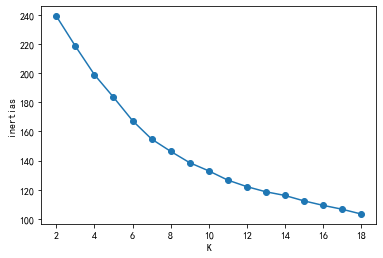

In [280]:
plt.plot(range(2,19),inertias,marker='o')
plt.xlabel('K')
plt.ylabel('inertias')

### 绘制轮廓系数曲线

In [281]:
# 导入轮廓系数API
from sklearn.metrics import silhouette_score

In [282]:
#绘制学习曲线
sil=[]
for i in range(2,19):
#聚类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(data_norm)
    #轮廓系数
    s=silhouette_score(data_norm,y_pred)
    sil.append(s)

Text(0, 0.5, 'silhouette_score')

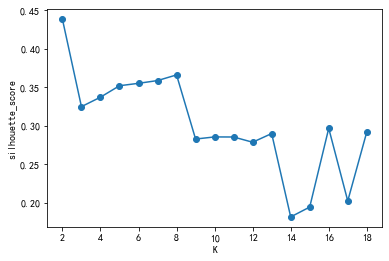

In [283]:
plt.plot(range(2,19),sil,marker='o')
plt.xlabel('K')
plt.ylabel('silhouette_score')

### 确定k=8来建模

In [284]:
kmeans=KMeans(n_clusters=8,random_state=666)
y_pred=kmeans.fit_predict(data_norm)
centers=kmeans.cluster_centers_
labels=kmeans.labels_

In [285]:
pd.Series(labels).unique()

array([0, 4, 1, 7, 3, 5, 6, 2], dtype=int64)

In [286]:
labels.shape

(3418,)

In [287]:
user_items_tag.shape

(3418, 15)

In [288]:
user_items_tag['类别']=labels

In [289]:
user_items_tag.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生,婴儿|,婴儿|幼儿|,婴儿|幼儿|儿童|,婴儿|幼儿|儿童|学生,幼儿|,幼儿|儿童|,幼儿|儿童|学生,类别
0,0,福建省,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1,北京,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,2,吉林省,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
3,3,浙江省,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,4,江苏省,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0


In [290]:
cluster=user_items_tag[['买家会员名','类别']]

In [291]:
cluster.head()

,买家会员名,类别
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [292]:
cluster.to_csv('cluster.csv',encoding='utf-8',index=False)